In [1]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import operator

In [97]:
import xgboost

In [2]:
train=pd.read_csv('train.csv')
validation=pd.read_csv('validation.csv')
test=pd.read_csv('test.csv')

In [26]:
y = train.click
y_validation = validation.click

In [90]:
eval_cons = pd.DataFrame(columns=['bid_base','Imps','spend','clicks'])

max_num = 0
max_bid = 0
spend = 0
best = 0
iteration = 0

for bid_base in np.arange(3,300,2):
    num_click = 0
    flag = True
    Imps = 0
    spend = 0
    iteration += 1
    for i in range(validation.shape[0]):
        bid = bid_base
        
        if bid >= validation.payprice[i] and flag:
            spend = spend + validation.payprice[i]
            if spend > 6250000:
                spend = spend - validation.payprice[i]
                flag = False
                break
            num_click = num_click + validation.click[i]
            Imps = Imps + 1
    eval_cons.loc[iteration,'bid_base'] = bid_base
    eval_cons.loc[iteration,'clicks'] = num_click
    eval_cons.loc[iteration,'spend'] = spend/1000
    eval_cons.loc[iteration,'Imps'] = Imps
    
    if num_click > max_num:
        max_num  = num_click
        max_bid = bid_base
        best = bid_base
        
eval_cons['CTR'] = eval_cons['clicks']/eval_cons['Imps']
eval_cons['eCPC'] = eval_cons['spend']/eval_cons['clicks']
eval_cons['CPM'] = eval_cons['spend']*1000/eval_cons['Imps']

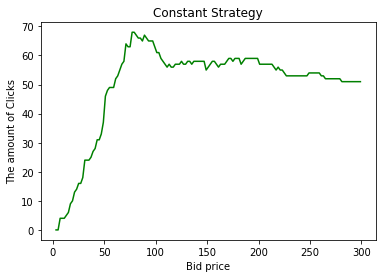

In [94]:
first_line = eval_cons[['bid_base','clicks']].astype(float)
fig, ax1 = plt.subplots()
ax1.plot(first_line.bid_base,first_line.clicks, color='g')
ax1.set_xlabel('Bid price')
ax1.set_ylabel('The amount of Clicks')

plt.title("Constant Strategy")
plt.savefig('constant.png',dpi = 300)
plt.show()

In [4]:
eval_Random = pd.DataFrame(columns=['lower','upper','bid','Imps','spend','clicks'])

max_num = 0
max_bid = 0
spend = 0
iteration = 0

for lower in np.arange(30,70,5):
    for upper in np.arange(80,310,5):
        
        num_click = 0
        flag = True
        Imps = 0
        spend = 0
        iteration += 1
        for i in range(validation.shape[0]):
            bid = random.randint(lower,upper)
            if bid >= validation.payprice[i] and flag:
                spend = spend + validation.payprice[i]
                if spend > 6250000:
                    spend = spend - validation.payprice[i]
                    flag = False
                    break
                num_click = num_click + validation.click[i]
                Imps = Imps + 1
                
        eval_Random.loc[iteration,'lower'] = lower
        eval_Random.loc[iteration,'upper'] = upper
        eval_Random.loc[iteration,'bid'] = bid
        eval_Random.loc[iteration,'clicks'] = num_click
        eval_Random.loc[iteration,'spend'] = spend/1000
        eval_Random.loc[iteration,'Imps'] = Imps
    
                
        if num_click > max_num:
            max_num = num_click
            #max_bid = bid_base

eval_Random['CTR'] = eval_Random['clicks']/eval_Random['Imps']
eval_Random['eCPC'] = eval_Random['spend']/eval_Random['clicks']
eval_Random['CPM'] = eval_Random['spend']*1000/eval_Random['Imps']

In [6]:
eval_Random.to_csv('random_bid.csv')

In [7]:
eval_Random =eval_Random.sort_values(by = 'bid')
eval_Random.iloc[np.where(eval_Random.clicks == eval_Random.clicks.max())[0]]

,lower,upper,bid,Imps,spend,clicks,CTR,eCPC,CPM
54,35,115,94,149045,6249.92,78,0.000523332,80.1272,41.9331


In [86]:
eval_Random1 = pd.DataFrame(columns=['lower','upper','bid','Imps','spend','clicks'])

max_num = 0
max_bid = 0
spend = 0
iteration = 0
random5 = []
for j in range(66):
        random5.append(np.random.uniform(40,50))
    

num_click = 0
flag = True
Imps = 0
spend = 0
iteration += 1
for i in range(validation.shape[0]):
    if validation.payprice[i] > np.sort(random5)[-2]:
        payprice = validation.payprice[i]
    else:
        payprice = np.sort(random5)[-2]
        bid = np.sort(random5)[-1]
    if bid >= payprice and flag:
        spend = spend + validation.payprice[i]
        if spend > 6250000:
            spend = spend - validation.payprice[i]
            flag = False
            break
        num_click = num_click + validation.click[i]
        Imps = Imps + 1
                
eval_Random1.loc[iteration,'lower'] = 40
eval_Random1.loc[iteration,'upper'] = 50
eval_Random1.loc[iteration,'bid'] = bid
eval_Random1.loc[iteration,'clicks'] = num_click
eval_Random1.loc[iteration,'spend'] = spend/1000
eval_Random1.loc[iteration,'Imps'] = Imps
    
                
if num_click > max_num:
    max_num = num_click
    #max_bid = bid_base

eval_Random1['CTR'] = eval_Random['clicks']/eval_Random['Imps']
eval_Random1['eCPC'] = eval_Random['spend']/eval_Random['clicks']
eval_Random1['CPM'] = eval_Random['spend']*1000/eval_Random['Imps']

In [87]:
eval_Random1

,lower,upper,bid,Imps,spend,clicks,CTR,eCPC,CPM
1,40,50,49.8339,101750,2459.37,37,0.000391638,81.1511,31.7818


In [39]:
eval_Random2 = pd.DataFrame(columns=['lower','upper','bid','Imps','spend','clicks'])

max_num = 0
max_bid = 0
spend = 0
iteration = 0
random6 = []
for j in range(50):
        random6.append(np.random.uniform(50,60))
    

num_click = 0
flag = True
Imps = 0
spend = 0
iteration += 1
for i in range(validation.shape[0]):
    if validation.payprice[i] > np.sort(random6)[-2]:
        payprice = validation.payprice[i]
    else:
        payprice = np.sort(random6)[-2]
        bid = np.sort(random6)[-1]
    if bid >= payprice and flag:
        spend = spend + validation.payprice[i]
        if spend > 6250000:
            spend = spend - validation.payprice[i]
            flag = False
            break
        num_click = num_click + validation.click[i]
        Imps = Imps + 1
                
eval_Random2.loc[iteration,'lower'] = 50
eval_Random2.loc[iteration,'upper'] = 60
eval_Random2.loc[iteration,'bid'] = bid
eval_Random2.loc[iteration,'clicks'] = num_click
eval_Random2.loc[iteration,'spend'] = spend/1000
eval_Random2.loc[iteration,'Imps'] = Imps
    
                
if num_click > max_num:
    max_num = num_click
    #max_bid = bid_base

eval_Random2['CTR'] = eval_Random['clicks']/eval_Random['Imps']
eval_Random2['eCPC'] = eval_Random['spend']/eval_Random['clicks']
eval_Random2['CPM'] = eval_Random['spend']*1000/eval_Random['Imps']

In [40]:
eval_Random2

,lower,upper,bid,Imps,spend,clicks,CTR,eCPC,CPM
1,50,60,59.2633,138836,4418.27,49,0.000391638,81.1511,31.7818


In [41]:
eval_Random3 = pd.DataFrame(columns=['lower','upper','bid','Imps','spend','clicks'])

max_num = 0
max_bid = 0
spend = 0
iteration = 0
random7 = []
for j in range(50):
        random7.append(np.random.uniform(60,70))
    

num_click = 0
flag = True
Imps = 0
spend = 0
iteration += 1
for i in range(validation.shape[0]):
    if validation.payprice[i] > np.sort(random7)[-2]:
        payprice = validation.payprice[i]
    else:
        payprice = np.sort(random7)[-2]
        bid = np.sort(random7)[-1]
    if bid >= payprice and flag:
        spend = spend + validation.payprice[i]
        if spend > 6250000:
            spend = spend - validation.payprice[i]
            flag = False
            break
        num_click = num_click + validation.click[i]
        Imps = Imps + 1
                
eval_Random3.loc[iteration,'lower'] = 60
eval_Random3.loc[iteration,'upper'] = 70
eval_Random3.loc[iteration,'bid'] = bid
eval_Random3.loc[iteration,'clicks'] = num_click
eval_Random3.loc[iteration,'spend'] = spend/1000
eval_Random3.loc[iteration,'Imps'] = Imps
    
                
if num_click > max_num:
    max_num = num_click
    #max_bid = bid_base

eval_Random3['CTR'] = eval_Random['clicks']/eval_Random['Imps']
eval_Random3['eCPC'] = eval_Random['spend']/eval_Random['clicks']
eval_Random3['CPM'] = eval_Random['spend']*1000/eval_Random['Imps']

In [42]:
eval_Random3

,lower,upper,bid,Imps,spend,clicks,CTR,eCPC,CPM
1,60,70,69.7485,153397,5352.57,58,0.000391638,81.1511,31.7818


In [45]:
eval_Random4 = pd.DataFrame(columns=['lower','upper','bid','Imps','spend','clicks'])

max_num = 0
max_bid = 0
spend = 0
iteration = 0
random8 = []
for j in range(50):
        random8.append(np.random.uniform(70,80))
    

num_click = 0
flag = True
Imps = 0
spend = 0
iteration += 1
for i in range(validation.shape[0]):
    if validation.payprice[i] > np.sort(random8)[-2]:
        payprice = validation.payprice[i]
    else:
        payprice = np.sort(random8)[-2]
        bid = np.sort(random8)[-1]
    if bid >= payprice and flag:
        spend = spend + validation.payprice[i]
        if spend > 6250000:
            spend = spend - validation.payprice[i]
            flag = False
            break
        num_click = num_click + validation.click[i]
        Imps = Imps + 1
                
eval_Random4.loc[iteration,'lower'] = 70
eval_Random4.loc[iteration,'upper'] = 80
eval_Random4.loc[iteration,'bid'] = bid
eval_Random4.loc[iteration,'clicks'] = num_click
eval_Random4.loc[iteration,'spend'] = spend/1000
eval_Random4.loc[iteration,'Imps'] = Imps
    
                
if num_click > max_num:
    max_num = num_click
    #max_bid = bid_base

eval_Random4['CTR'] = eval_Random['clicks']/eval_Random['Imps']
eval_Random4['eCPC'] = eval_Random['spend']/eval_Random['clicks']
eval_Random4['CPM'] = eval_Random['spend']*1000/eval_Random['Imps']

In [46]:
eval_Random4

,lower,upper,bid,Imps,spend,clicks,CTR,eCPC,CPM
1,70,80,79.8843,145916,6249.96,68,0.000391638,81.1511,31.7818


In [47]:
eval_Random5 = pd.DataFrame(columns=['lower','upper','bid','Imps','spend','clicks'])

max_num = 0
max_bid = 0
spend = 0
iteration = 0
random9= []
for j in range(50):
        random9.append(np.random.uniform(80,90))
    

num_click = 0
flag = True
Imps = 0
spend = 0
iteration += 1
for i in range(validation.shape[0]):
    if validation.payprice[i] > np.sort(random9)[-2]:
        payprice = validation.payprice[i]
    else:
        payprice = np.sort(random9)[-2]
        bid = np.sort(random9)[-1]
    if bid >= payprice and flag:
        spend = spend + validation.payprice[i]
        if spend > 6250000:
            spend = spend - validation.payprice[i]
            flag = False
            break
        num_click = num_click + validation.click[i]
        Imps = Imps + 1
                
eval_Random5.loc[iteration,'lower'] = 80
eval_Random5.loc[iteration,'upper'] = 90
eval_Random5.loc[iteration,'bid'] = bid
eval_Random5.loc[iteration,'clicks'] = num_click
eval_Random5.loc[iteration,'spend'] = spend/1000
eval_Random5.loc[iteration,'Imps'] = Imps
    
                
if num_click > max_num:
    max_num = num_click
    #max_bid = bid_base

eval_Random5['CTR'] = eval_Random['clicks']/eval_Random['Imps']
eval_Random5['eCPC'] = eval_Random['spend']/eval_Random['clicks']
eval_Random5['CPM'] = eval_Random['spend']*1000/eval_Random['Imps']

In [48]:
eval_Random5

,lower,upper,bid,Imps,spend,clicks,CTR,eCPC,CPM
1,80,90,89.9522,131020,6249.95,67,0.000391638,81.1511,31.7818


In [58]:
eval_Random6 = pd.DataFrame(columns=['lower','upper','bid','Imps','spend','clicks'])

max_num = 0
max_bid = 0
spend = 0
iteration = 0
random10= []
for j in range(50):
        random10.append(np.random.uniform(90,100))
    

num_click = 0
flag = True
Imps = 0
spend = 0
iteration += 1
for i in range(validation.shape[0]):
    if validation.payprice[i] > np.sort(random10)[-2]:
        payprice = validation.payprice[i]
    else:
        payprice = np.sort(random10)[-2]
        bid = np.sort(random10)[-1]
    if bid >= payprice and flag:
        spend = spend + validation.payprice[i]
        if spend > 6250000:
            spend = spend - validation.payprice[i]
            flag = False
            break
        num_click = num_click + validation.click[i]
        Imps = Imps + 1
                
eval_Random6.loc[iteration,'lower'] = 90
eval_Random6.loc[iteration,'upper'] = 100
eval_Random6.loc[iteration,'bid'] = bid
eval_Random6.loc[iteration,'clicks'] = num_click
eval_Random6.loc[iteration,'spend'] = spend/1000
eval_Random6.loc[iteration,'Imps'] = Imps
    
                
if num_click > max_num:
    max_num = num_click
    #max_bid = bid_base

eval_Random6['CTR'] = eval_Random['clicks']/eval_Random['Imps']
eval_Random6['eCPC'] = eval_Random['spend']/eval_Random['clicks']
eval_Random6['CPM'] = eval_Random['spend']*1000/eval_Random['Imps']


In [59]:
eval_Random6

,lower,upper,bid,Imps,spend,clicks,CTR,eCPC,CPM
1,90,100,99.8474,126821,6250,63,0.000391638,81.1511,31.7818


In [61]:
eval_Random7 = pd.DataFrame(columns=['lower','upper','bid','Imps','spend','clicks'])

max_num = 0
max_bid = 0
spend = 0
iteration = 0
random11= []
for j in range(50):
        random11.append(np.random.uniform(100,110))
    

num_click = 0
flag = True
Imps = 0
spend = 0
iteration += 1
for i in range(validation.shape[0]):
    if validation.payprice[i] > np.sort(random11)[-2]:
        payprice = validation.payprice[i]
    else:
        payprice = np.sort(random11)[-2]
        bid = np.sort(random11)[-1]
    if bid >= payprice and flag:
        spend = spend + validation.payprice[i]
        if spend > 6250000:
            spend = spend - validation.payprice[i]
            flag = False
            break
        num_click = num_click + validation.click[i]
        Imps = Imps + 1
                
eval_Random7.loc[iteration,'lower'] = 100
eval_Random7.loc[iteration,'upper'] = 110
eval_Random7.loc[iteration,'bid'] = bid
eval_Random7.loc[iteration,'clicks'] = num_click
eval_Random7.loc[iteration,'spend'] = spend/1000
eval_Random7.loc[iteration,'Imps'] = Imps
    
                
if num_click > max_num:
    max_num = num_click
    #max_bid = bid_base

eval_Random7['CTR'] = eval_Random['clicks']/eval_Random['Imps']
eval_Random7['eCPC'] = eval_Random['spend']/eval_Random['clicks']
eval_Random7['CPM'] = eval_Random['spend']*1000/eval_Random['Imps']


In [62]:
eval_Random7

,lower,upper,bid,Imps,spend,clicks,CTR,eCPC,CPM
1,100,110,109.883,121680,6249.94,57,0.000391638,81.1511,31.7818


In [63]:
eval_Random8 = pd.DataFrame(columns=['lower','upper','bid','Imps','spend','clicks'])

max_num = 0
max_bid = 0
spend = 0
iteration = 0
random12= []
for j in range(50):
        random12.append(np.random.uniform(110,120))
    

num_click = 0
flag = True
Imps = 0
spend = 0
iteration += 1
for i in range(validation.shape[0]):
    if validation.payprice[i] > np.sort(random12)[-2]:
        payprice = validation.payprice[i]
    else:
        payprice = np.sort(random12)[-2]
        bid = np.sort(random12)[-1]
    if bid >= payprice and flag:
        spend = spend + validation.payprice[i]
        if spend > 6250000:
            spend = spend - validation.payprice[i]
            flag = False
            break
        num_click = num_click + validation.click[i]
        Imps = Imps + 1
                
eval_Random8.loc[iteration,'lower'] = 110
eval_Random8.loc[iteration,'upper'] = 120
eval_Random8.loc[iteration,'bid'] = bid
eval_Random8.loc[iteration,'clicks'] = num_click
eval_Random8.loc[iteration,'spend'] = spend/1000
eval_Random8.loc[iteration,'Imps'] = Imps
    
                
if num_click > max_num:
    max_num = num_click
    #max_bid = bid_base

eval_Random8['CTR'] = eval_Random['clicks']/eval_Random['Imps']
eval_Random8['eCPC'] = eval_Random['spend']/eval_Random['clicks']
eval_Random8['CPM'] = eval_Random['spend']*1000/eval_Random['Imps']


In [64]:
eval_Random8

,lower,upper,bid,Imps,spend,clicks,CTR,eCPC,CPM
1,110,120,119.746,117734,6249.95,57,0.000391638,81.1511,31.7818


In [79]:
eval_Random9 = pd.DataFrame(columns=['lower','upper','bid','Imps','spend','clicks'])

max_num = 0
max_bid = 0
spend = 0
iteration = 0
random13= []
for j in range(50):
        random13.append(np.random.uniform(120,130))
    

num_click = 0
flag = True
Imps = 0
spend = 0
iteration += 1
for i in range(validation.shape[0]):
    if validation.payprice[i] > np.sort(random13)[-2]:
        payprice = validation.payprice[i]
    else:
        payprice = np.sort(random13)[-2]
        bid = np.sort(random13)[-1]
    if bid >= payprice and flag:
        spend = spend + validation.payprice[i]
        if spend > 6250000:
            spend = spend - validation.payprice[i]
            flag = False
            break
        num_click = num_click + validation.click[i]
        Imps = Imps + 1
                
eval_Random9.loc[iteration,'lower'] = 120
eval_Random9.loc[iteration,'upper'] = 130
eval_Random9.loc[iteration,'bid'] = bid
eval_Random9.loc[iteration,'clicks'] = num_click
eval_Random9.loc[iteration,'spend'] = spend/1000
eval_Random9.loc[iteration,'Imps'] = Imps
    
                
if num_click > max_num:
    max_num = num_click
    #max_bid = bid_base

eval_Random9['CTR'] = eval_Random['clicks']/eval_Random['Imps']
eval_Random9['eCPC'] = eval_Random['spend']/eval_Random['clicks']
eval_Random9['CPM'] = eval_Random['spend']*1000/eval_Random['Imps']


In [80]:
eval_Random9

,lower,upper,bid,Imps,spend,clicks,CTR,eCPC,CPM
1,120,130,129.847,114033,6249.94,57,0.000391638,81.1511,31.7818


In [81]:
df = pd.concat([eval_Random2, eval_Random3,eval_Random4,eval_Random5,eval_Random6,eval_Random7,eval_Random8,eval_Random9])

In [96]:
df.to_csv("multi-agent random bidding.csv")